In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import wandb
from wandb.keras import WandbCallback
from tensorflow.keras.callbacks import ModelCheckpoint


In [2]:
wandb.login()

wandb: Currently logged in as: gharabadiyan. Use `wandb login --relogin` to force relogin


True

In [3]:
wandb.init(project="weather", entity="gharabadiyan")

c:\users\frsco\appdata\local\programs\python\python37\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [4]:
config = wandb.config
config.learning_rate = 0.001

In [5]:
data = pd.read_csv('weatherHistory.csv')
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'])
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00+02:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00+02:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00+02:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00+02:00,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [6]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)
data['Formatted Date'] = data['Formatted Date'].dt.date
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)
data['dayofyear'] = data['Formatted Date'].dt.dayofyear
data['year'] = data['Formatted Date'].dt.year
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,dayofyear,year
0,2006-03-31 00:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,90,2006
1,2006-03-31 00:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,90,2006
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,91,2006
3,2006-04-01 00:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,91,2006
4,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,91,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 00:00:00+00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,253,2016
96449,2016-09-09 00:00:00+00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,253,2016
96450,2016-09-09 00:00:00+00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,253,2016
96451,2016-09-09 00:00:00+00:00,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,253,2016


## Preprocess

In [7]:
tempreture = data.groupby(['dayofyear','year'])['Temperature (C)'].mean().reset_index()
tempreture

,dayofyear,year,Temperature (C)
0,1,2006,4.075000
1,1,2007,3.806713
2,1,2008,-5.663194
3,1,2009,-4.850926
4,1,2010,7.807407
...,...,...,...
4014,365,2015,-4.304861
4015,365,2016,0.117593
4016,366,2008,-6.218056
4017,366,2012,-3.249306


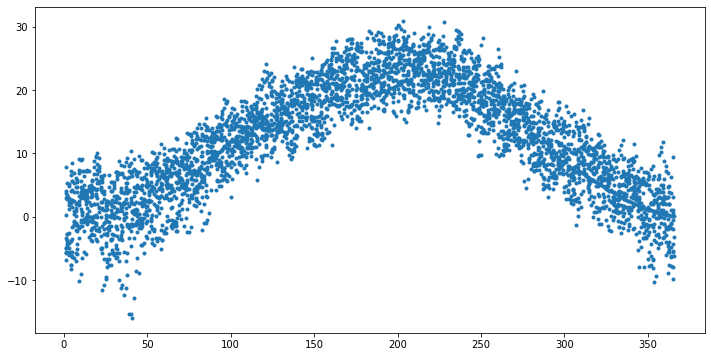

In [8]:
plt.figure(figsize=(12,6))
plt.scatter(tempreture['dayofyear'],tempreture['Temperature (C)'],marker='.')

In [9]:
X = tempreture[['dayofyear','year']].values
Y = tempreture['Temperature (C)'].values

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2 ,random_state=32)


## Model

In [10]:
model = tf.keras.models.Sequential([
    Dense(512,input_dim=2,activation="relu"),
    Dense(280,activation='elu'),
    # Dense(120,activation="relu"),
    Dense(64,activation="elu"),
    Dense(1,activation='linear')
])

In [11]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=config.learning_rate),
              loss = tf.losses.MeanSquaredError())

In [12]:
model.fit(X_train,Y_train,epochs=1000,callbacks=[WandbCallback()])

wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/1000
101/101 [==============================] - 1s 2ms/step - loss: 3787.1362 - _timestamp: 1653817913.0000 - _runtime: 27.0000
Epoch 2/1000
101/101 [==============================] - 0s 3ms/step - loss: 382.1070 - _timestamp: 1653817913.0000 - _runtime: 27.0000
Epoch 3/1000
101/101 [==============================] - 0s 2ms/step - loss: 131.8303 - _timestamp: 1653817913.0000 - _runtime: 27.0000
Epoch 4/1000
101/101 [==============================] - 0s 2ms/step - loss: 83.5728 - _timestamp: 1653817914.0000 - _runtime: 28.0000
Epoch 5/1000
101/101 [==============================] - 0s 3ms/step - loss: 45.2747 - _timestamp: 1653817914.0000 - _runtime: 28.0000
Epoch 6/1000
101/101 [==============================] - 0s 2ms/step - loss: 32.6320 - _timestamp: 1653817914.0000 - _runtime: 28.0000
Epoch 7/1000
101/101 [==============================] - 0s 3ms/step - loss: 26.3684 - _timestamp: 1653817914.0000 - _runtime: 28.0000
Epoch 8/1000
101/101 [==============================] - 0s

In [14]:
evaluate_test = model.evaluate(X_test,Y_test)
evaluate_test

26/26 [==============================] - 0s 2ms/step - loss: 15.7154


15.715446472167969

In [15]:
opt = tf.keras.optimizers.RMSprop(lr=0.001, decay=1e-6)
model = tf.keras.models.Sequential()
model.add(Dense(110, activation="relu", input_shape=(2,)))
for i in range(20):
    model.add(Dense(20, activation="elu"))
model.add(Dense(1, activation="linear"))


c:\users\frsco\appdata\local\programs\python\python37\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [16]:
model.compile(optimizer="rmsprop",loss="mean_absolute_error")

In [17]:
model.fit(X_train,Y_train,epochs=1000,callbacks=[WandbCallback()])

Epoch 1/1000
101/101 [==============================] - 2s 2ms/step - loss: 7.5377 - _timestamp: 1653819371.0000 - _runtime: 1485.0000
Epoch 2/1000
101/101 [==============================] - 0s 2ms/step - loss: 5.4332 - _timestamp: 1653819371.0000 - _runtime: 1485.0000
Epoch 3/1000
101/101 [==============================] - 0s 2ms/step - loss: 4.2847 - _timestamp: 1653819372.0000 - _runtime: 1486.0000
Epoch 4/1000
101/101 [==============================] - 0s 2ms/step - loss: 4.1330 - _timestamp: 1653819372.0000 - _runtime: 1486.0000
Epoch 5/1000
101/101 [==============================] - 0s 2ms/step - loss: 3.9511 - _timestamp: 1653819372.0000 - _runtime: 1486.0000
Epoch 6/1000
101/101 [==============================] - 0s 2ms/step - loss: 3.9019 - _timestamp: 1653819372.0000 - _runtime: 1486.0000
Epoch 7/1000
101/101 [==============================] - 0s 2ms/step - loss: 3.7874 - _timestamp: 1653819372.0000 - _runtime: 1486.0000
Epoch 8/1000
101/101 [==============================] -

In [18]:
evaluate_test = model.evaluate(X_test,Y_test)
evaluate_test

26/26 [==============================] - 0s 2ms/step - loss: 3.0373


3.0372869968414307